In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

warnings.filterwarnings("ignore")

In [ ]:
data = dict()

#DELAAAAAAAAAAAAAAAAAAAAAAAAA
data["2017"] = [pd.read_csv("data/2017/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2017/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2017/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI")]

#DELA
data["2018"] = [pd.read_csv("data/2018/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2018/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2018/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI"), pd.read_csv("data/2018/NIO_tz_meritve_2.csv", delimiter=";", encoding="ANSI")])]

#DELA
data["2019"] = [pd.read_csv("data/2019/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2019/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2019/NIO_tz_meritve_1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2019/NIO_tz_meritve_2.csv", delimiter=";", encoding="UTF-8")])]

#DELA
data["2020"] = [pd.read_csv("data/2020/napake.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2020/uspesnost1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2020/uspesnost2.csv", delimiter=";", encoding="UTF-8")]), pd.concat([pd.read_csv("data/2020/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI"), pd.read_csv("data/2020/NIO_tz_meritve_2.csv", delimiter=";", encoding="ANSI")])]

#DELA
data["2021"] = [pd.read_csv("data/2021/napake.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2021/uspesnost1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2021/uspesnost2.csv", delimiter=";", encoding="UTF-8")]), pd.concat([pd.read_csv("data/2021/NIO_tz_meritve_1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2021/NIO_tz_meritve_2.csv", delimiter=";", encoding="UTF-8")])]

In [ ]:
#data["2017"][1].loc[data["2017"][1]["VIN"].unique()]
#data["2017"][2].loc[data["2017"][2]["E-VIN"] == "WAUZZZ4BZ1N098776"]
#data["2021"][1].columns.values.tolist()

tehnicni_per_year = [data["2017"][1].shape[0], data["2018"][1].shape[0], data["2019"][1].shape[0], data["2020"][1].shape[0], data["2021"][1].shape[0]]

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.plot(data.keys(), tehnicni_per_year)
ax.set_xlabel("Leto")
ax.set_ylabel("Število tehničnih pregledov")
ax.set_title("Število tehničnih pregledov na leto")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()


In [ ]:
neuspesni_tehnicni_per_year = [data["2017"][1].loc[data["2017"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2018"][1].loc[data["2018"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2019"][1].loc[data["2019"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2020"][1].loc[data["2020"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2021"][1].loc[data["2021"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0]]

tehnicni_zip = zip(tehnicni_per_year, neuspesni_tehnicni_per_year)
procent_uspesnosti = []

for stevilo, neuspesni in tehnicni_zip:
    procent_uspesnosti.append((stevilo-neuspesni) / stevilo)

procent_uspesnosti

fig, ax = plt.subplots()
plt.ylim(0.92, 0.95)
ax.bar(data.keys(), procent_uspesnosti,)
ax.set_xlabel("Leto")
ax.set_ylabel("Uspešnost tehničnih pregledov")
ax.set_title("Uspešnost tehničnih pregledov na leto")
plt.show()
#data["2017"][1]["TEHNICNI_PREGLED_STATUS"].unique()
#data["2017"][0].shape[0]

In [ ]:
#data["2017"][1].columns.values.tolist()
#data["2017"][1]["KATEGORIJA_OPIS"].unique()
samo_osebni_avtomobili = dict()
samo_osebni_avtomobili["2017"] = data["2017"][1].loc[data["2017"][1]["KATEGORIJA_OPIS"] == "osebni avtomobil"]["ZNAMKA"].value_counts().head(15)
samo_osebni_avtomobili["2018"] = data["2018"][1].loc[data["2018"][1]["KATEGORIJA_OPIS"] == "osebni avtomobil"]["ZNAMKA"].value_counts().head(15)
samo_osebni_avtomobili["2019"] = data["2019"][1].loc[data["2019"][1]["KATEGORIJA_OPIS"] == "osebni avtomobil"]["ZNAMKA"].value_counts().head(15)
samo_osebni_avtomobili["2020"] = data["2020"][1].loc[data["2020"][1]["KATEGORIJA_OPIS"] == "osebni avtomobil"]["ZNAMKA"].value_counts().head(15)
samo_osebni_avtomobili["2021"] = data["2021"][1].loc[data["2021"][1]["KATEGORIJA_OPIS"] == "osebni avtomobil"]["ZNAMKA"].value_counts().head(15)

samo_osebni_avtomobili["2021"].keys()

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

def drawChart(leto):
    fig, ax = plt.subplots(figsize =(50, 20))
    explode = [0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.15, 0.15, 0.25, 0.25, 0.25, 0.25, 0.25]
    wedges, texts, autotexts = ax.pie(samo_osebni_avtomobili[leto],
                                    autopct = lambda pct: func(pct, samo_osebni_avtomobili[leto]),
                                    labels = samo_osebni_avtomobili[leto].keys(),
                                    explode=explode,
                                    shadow = True,
                                    startangle = 90,
                                    wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"},
                                    textprops = dict(color ="black"))
    
    # Adding legend
    ax.legend(wedges, samo_osebni_avtomobili[leto].keys(),
            title ="Znamka avtomobilov",
            loc ="center left",
            bbox_to_anchor =(1, 0.5, 0.5, 1),
            prop={'size': 15})
    
    plt.setp(autotexts, size = 13, weight ="bold")
    ax.set_title("RAZDELITEV ZNAMK LETA " + leto, pad=70, fontsize=20, color="red")
    
    # show plot
    plt.show()

for leto in range(2017, 2022):
    drawChart(str(leto))

#data["2017"][1].loc[data["2017"][1]["KATEGORIJA_OPIS"] == "osebni avtomobil"]["ZNAMKA"]
#data["2017"][1]["ZNAMKA"].value_counts().head(20)

In [ ]:
# print(data["2017"][1]["KATEGORIJA_OPIS"].value_counts().head(10))
# print(data["2018"][1]["KATEGORIJA_OPIS"].value_counts().head(10))
# print(data["2019"][1]["KATEGORIJA_OPIS"].value_counts().head(10))
# print(data["2020"][1]["KATEGORIJA_OPIS"].value_counts().head(10))
# print(data["2021"][1]["KATEGORIJA_OPIS"].value_counts().head(10))

def drawKategorijaChart(leto):
    fig, ax = plt.subplots(figsize =(20, 10))
    ax.barh(data[leto][1]["KATEGORIJA_OPIS"].value_counts().head(10).keys(), data[leto][1]["KATEGORIJA_OPIS"].value_counts().head(10))
    ax.bar_label(ax.barh(data[leto][1]["KATEGORIJA_OPIS"].value_counts().head(10).keys(), data[leto][1]["KATEGORIJA_OPIS"].value_counts().head(10)), fmt="%d")

    ax.set_xlabel("Število vozil")
    ax.set_ylabel("Vrsta vozila")
    ax.set_title("Število vozil glede na vrsto leta " + leto)
    ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.show()

for leto in range(2017,2022):
    drawKategorijaChart(str(leto))

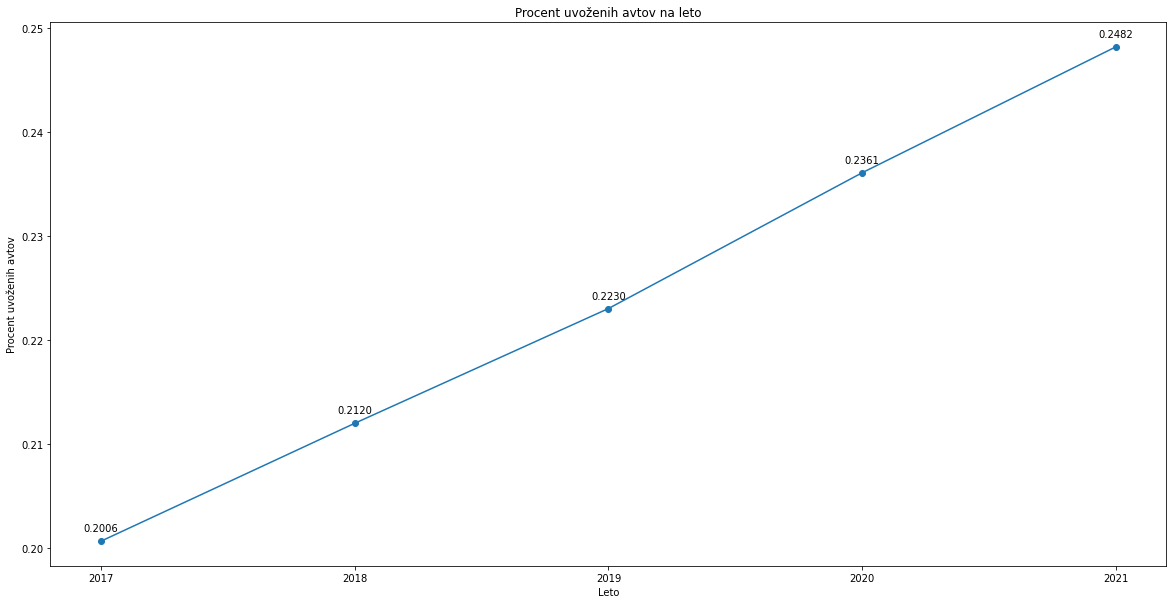

In [31]:
#poglej ce uvazajo vec avtov:

procent_uvozenih = dict()

procent_uvozenih["2017"] = (len(data["2017"][1]) - len(np.where(data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2017"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2017"][1])
procent_uvozenih["2018"] = (len(data["2018"][1]) - len(np.where(data["2018"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2018"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2018"][1])
procent_uvozenih["2019"] = (len(data["2019"][1]) - len(np.where(data["2019"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2019"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2019"][1])
procent_uvozenih["2020"] = (len(data["2020"][1]) - len(np.where(data["2020"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2020"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2020"][1])
procent_uvozenih["2021"] = (len(data["2021"][1]) - len(np.where(data["2021"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2021"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2021"][1])

procent_uvozenih

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.plot(procent_uvozenih.keys(), procent_uvozenih.values(), marker='o')
ax.set_xlabel("Leto")
ax.set_ylabel("Procent uvoženih avtov")
ax.set_title("Procent uvoženih avtov na leto")

for x, y in zip(procent_uvozenih.keys(), procent_uvozenih.values()):
    label = "{:.4f}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

#print(len(data["2018"][1]))
#data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"]